<a id='intro1'></a>

# 1. Introduction, index and imports
This is my first attempt at a machine learning model. The following notebook consists of developing a simple ML model and tuning it with different columns, k-values etc. Being me I couldn't obediently follow all the lessons steps. No, instead I've decided to fiddle with a few more knobs and combinations:
* I didn't choose one way to clean the dataset, I've created 3 different versions of the dataset, then normalized them (or not) to test various models on every one of them
* I've experimented with various random seed numbers and always checked the model changes against a certain number of random seeds
* Instead of choosing the columns from the top of the list of single-column results, I've checked almost all the possible column combinations (with engine_size always included)

<a id='top'></a>

# Index:

1. [Introduction, imports and index](#intro1)
    * [1.1. Initial dataset inspection](#inspect11)
    * [1.2. Data cleaning](#clean12)
    * [1.3. numeric_c dataset and normalizing datasets](#numc13)
    
    
2. [Univariate k-nearest neighbors model](#bestcol2)
    * 2.1. [Selecting best column for a single column model](#uni21)
    * 2.2. [Introducing random seed into the model](#seed22)
        * 2.2.1. [Sidenote how much randomness do we need?](#how221)
    * 2.3. [Comparing results of normalized and non normalized dataframes:](#compare23)
    * 2.4. [Column selection](#colsel231)
    
    
3. [Multivariate Model](#multi3)
    * 3.1. [Preparation and test](#prep31)
    * 3.2. [Test on 100 random seeds](#test32)
    * 3.3. [Testing  multiple column combinations](#testm33)
        * 3.3.1. [Generating results](#testm33)
        * 3.3.2. [Visualizing results data](#viz332)
        * 3.3.3. [Results analysis](#res333)
    * 3.4. [Hyperparameter Tuning](#hyper34)
    * 3.5. [Cross validation](#cross35)


**Links:**
[Dataset](https://archive.ics.uci.edu/ml/datasets/automobile) [My Github](https://github.com/grumpyclimber/portfolio) [My LinkedIn](https://www.linkedin.com/in/adam-kubalica-787a79220/)


**Imports:**

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
from collections import Counter
from itertools import combinations
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

<a id='inspect11'></a>

# 1.1. Initial dataset inspection
[back to top](#top)

In [3]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [5]:
df.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Initial observations:
* we're managing a fairly small dataset - we should try to avoid removing rows
* we can see missing values replaced with '?' sign
* some columns which seem numeric are not numeric at all - this is probably due to storing missing values as '?'

<a id='clean12'></a>

# 1.2. Data cleaning 
[back to top](#top)

**We have some missing values - instead of applying 1 method to a single dataframe, we'll create 6 different dataframes:**
* numeric_a - we'll drop rows without the price value, and fill the remaining empty cells with avg values for their columns
* numeric_b - in this df we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', 'price', the remaining empty cells will be  filled with avg values for their columns
* numeric_c - we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', then **we'll take special care filling in the missing values in price column**, the remaining empty cells(normalized losses) will be  filled with avg values for their columns

We'll also create **normalized versions** of the above dataframes: numeric_a_n, numeric_b_n, numeric_c_n

In [6]:
numeric_cols = ['normalized_losses', 'price', 'bore', 'stroke', 'horsepower', 'peak_rpm',]
df[numeric_cols] = np.where(df[numeric_cols] == '?', '', df[numeric_cols])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df[df.columns[df.isna().any()]].isna().sum()

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [7]:
numeric = df.loc[:, df.dtypes != object].copy()
numeric_a = numeric.dropna(subset = ['price']).copy()
numeric_a = numeric_a.fillna(numeric.mean())
numeric_b = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']).copy()
numeric_b = numeric_b.fillna(numeric_b.mean())

<a id='numc13'></a>

# 1.3. numeric_c 
[back to top](#top)

In [8]:
corr_df = numeric_a.corr()['price'].to_frame().merge(numeric_b.corr()['price'], 
                                           left_index=True, right_index=True, suffixes=['_A_corr', '_B_corr'])
corr_df.sort_values('price_A_corr')

,price_A_corr,price_B_corr
highway_mpg,-0.704692,-0.715590
city_mpg,-0.686571,-0.702685
peak_rpm,-0.101616,-0.104333
symboling,-0.082391,-0.084118
compression_rate,0.071107,0.069500
stroke,0.082269,0.093746
normalized_losses,0.133999,0.131736
height,0.135486,0.138291
bore,0.543155,0.546873
wheel_base,0.584642,0.585793


**How to fill in the missing price values for numeric_c?**

In numeric a and b dataframes we've filled in the missing values, using the mean value for the column. Very simplistic aproach that we're going to modify and upgrade for the dataframe numeric_c.
Our plan assumed being very thorough in filling in the missing price values in the last dataframe, that's why we've created a corelation dataframe for the 'price' column.
* in both dataframes the column with the highest corelation value with 'price' column is 'engine_size'
* we'll group the dataframe by engine_size - to increase precision we'll group the data into 20 bins
    * then we'll calculate average price value for every engine_size bin 
    * we'll assing the missing price values based on their engine_size
* **prediction:** the 'engine_size' column will most likely be the best column for predicting the price value

In [9]:
numeric_c = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm']).copy()
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [10]:
bins = numeric_c['engine_size'].value_counts(bins=20).index
numeric_c.groupby(pd.cut(numeric_c.engine_size, bins=bins))['price'].mean()

engine_size
(87.5, 100.75]      7265.948276
(100.75, 114.0]     9754.628571
(114.0, 127.25]    11619.034483
(140.5, 153.75]    15516.047619
(127.25, 140.5]    17510.142857
(180.25, 193.5]    21027.000000
(153.75, 167.0]    16678.333333
(193.5, 206.75]    34528.000000
(167.0, 180.25]    17432.750000
(206.75, 220.0]    36318.333333
(233.25, 246.5]    34620.000000
(299.5, 312.75]    43180.000000
(246.5, 259.75]    33900.000000
(60.734, 74.25]     5151.000000
(74.25, 87.5]       5399.000000
(312.75, 326.0]    36000.000000
(220.0, 233.25]             NaN
(259.75, 273.0]             NaN
(273.0, 286.25]             NaN
(286.25, 299.5]             NaN
Name: price, dtype: float64

In [11]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [12]:
numeric_c.loc[9,'price'] = 16520.750000
numeric_c.loc[44,'price'] = 7265.948276
numeric_c.loc[45,'price'] = 7265.948276
numeric_c.loc[129,'price'] = 34528.000000

In [13]:
numeric_c[numeric_c.columns[numeric_c.isna().any()]].isna().sum()

normalized_losses    39
dtype: int64

In [14]:
numeric_c = numeric_c.fillna(numeric_c.mean())

# normalizing datasets:
Now that we have 3 different datasets, lets create normalized versions of them. We'll add "_n" at the end of their names to for 'normalized'

In [15]:
price_col = numeric_a['price']
numeric_a_n = (numeric_a - numeric_a.min())/(numeric_a.max() - numeric_a.min()).copy()
numeric_a_n['price'] = price_col

price_col = numeric_b['price']
numeric_b_n = (numeric_b - numeric_b.min())/(numeric_b.max() - numeric_b.min()).copy()
numeric_b_n['price'] = price_col

price_col = numeric_c['price']
numeric_c_n = (numeric_c - numeric_c.min())/(numeric_c.max() - numeric_c.min()).copy()
numeric_c_n['price'] = price_col

<a id='bestcol2'></a>

# 2. Univariate k-nearest neighbors model
[back to top](#top)

In the following steps will create a model using only 1 column from the dataframe to predict the price value. We'll test out different dataframes and columns and check their performance.

<a id='uni21'></a>

# 2.1. Selecting best column for a single column model
* we'll use the model on every column of our basic 3 dataframes

In [16]:
def knn_train_test(df, feature_col, target_col, r=1):
    # randomize
    np.random.seed(r)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    # train and predict
    knn = KNeighborsRegressor()
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [17]:
all_features = numeric.columns.tolist()
all_features.remove('price')
df_list = [numeric_a, numeric_b, numeric_c]
df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]

def fill_dict(model, dlist=df_list, r=1):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    for col in all_features:
        rmse_dict_a[col] = model(dlist[0], col, 'price', r)
    for col in all_features:
        rmse_dict_b[col] = model(dlist[1], col, 'price', r)
    for col in all_features:
        rmse_dict_c[col] = model(dlist[2], col, 'price', r)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c

def give_results_df(dict1, dict2, dict3):
    results_a = pd.DataFrame.from_dict(dict1, orient='index')
    results_b = pd.DataFrame.from_dict(dict2, orient='index')
    results_c = pd.DataFrame.from_dict(dict3, orient='index')

    results_frame_ab = results_a.merge(results_b, left_index=True, right_index=True, suffixes=['_numeric_A', '_numeric_B'])
    results_frame = results_frame_ab.merge(results_c, left_index=True, right_index=True)
    results_frame = results_frame.rename(columns={results_frame.columns[0]: 'numeric_a', results_frame.columns[1]: 'numeric_b', 
                                  results_frame.columns[2]: 'numeric_c'
                                  })
    results_frame = results_frame.sort_values(results_frame.loc[results_frame.idxmin(axis=0)[0],:].idxmin(axis=0))
    return results_frame
    
rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test)

results_frame = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
results_frame

,numeric_a,numeric_b,numeric_c
engine_size,3271.449938,4206.269209,3014.293169
curb_weight,4445.141920,4594.629028,3667.924168
highway_mpg,4643.046278,4368.230464,4139.949639
width,4772.459149,5038.643838,4290.488430
horsepower,4064.464572,4543.317619,4441.723870
city_mpg,4760.449842,4440.237523,4717.122297
wheel_base,5460.851458,5692.794469,6121.214509
length,5428.810101,5212.513611,6186.265681
compression_rate,6610.812153,7020.882648,6210.718457
peak_rpm,7649.170564,7309.974616,7043.426558


In [18]:
# lets create some functions we're going to use constantly on plots:
def spines(ax,yl='RMSE',xl=''):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    x5 = ax.set_ylabel(yl,size=14)
    x6 = ax.set_xlabel(xl,size=14)
    return x1, x2, x3, x4

def spines2():
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(3)
    x4 = ax.spines['bottom'].set_linewidth(3)
    return x1, x2, x3, x4

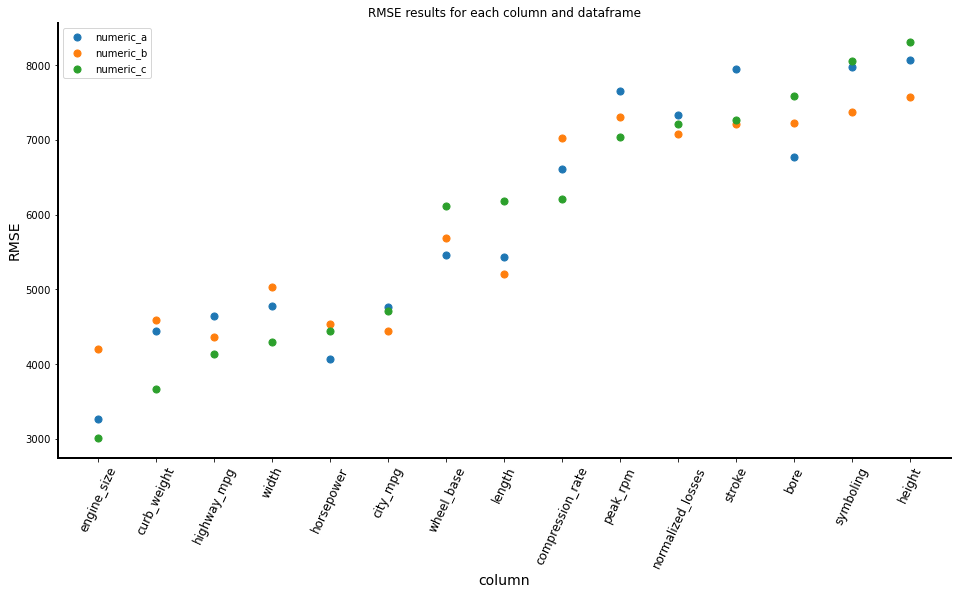

In [19]:
labels = ['numeric_a','numeric_b' ,'numeric_c']
y_list = [results_frame['numeric_a'], results_frame['numeric_b'], results_frame['numeric_c']]

def scatter_3(x, y_list, labels, size=10, alpha = 1):
    p1 = plt.scatter( x=x, y=y_list[0] ,label=labels[0], s=size)
    p2 = plt.scatter( x=x, y=y_list[1] ,label=labels[1], s=size)
    p3 = plt.scatter( x=x, y=y_list[2] ,label=labels[2], s=size)
    return p1, p2, p3

def scatter_3v2(x, y_list, labels, size=1, alpha = 1, z=True):
    p1 = sns.stripplot(x=x, y=y_list[0], label=labels[0], s=size,  alpha=alpha, color='#1f77b4', jitter=z)
    p2 = sns.stripplot(x=x, y=y_list[1], label=labels[1], s=size,  alpha=alpha, color='#ff7f0e' , jitter=z)
    p3 = sns.stripplot(x=x, y=y_list[2], label=labels[2], s=size,  alpha=alpha, color='green', jitter=z)
    return p1, p2, p3

fig, ax = plt.subplots(figsize=(16,8))

scatter_3(results_frame.index, y_list, labels, 50)
spines(ax,xl='column')

ax.tick_params(axis = 'x',labelsize=12, rotation=65)

plt.title('RMSE results for each column and dataframe')
plt.legend()
plt.show()

# Observations:
* taking extra care with filling in missing price values in dataframe 'numeric_c' paid of
* as expected 'engine_size' column delivers the best results (lowest rmse)
* big difference between numeric a and b is looks odd, we'll try a different arrangement of indexes:

<a id='seed22'></a>

# 2.2. Introducing random seed into the model
[back to top](#top)

In [20]:
# create a function with a random seed input
def knn_train_test_v2(df, feature_col, target_col, r):
    
    # randomize 
    np.random.seed(r)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # train and test 
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [21]:
df_list = [numeric_a, numeric_b, numeric_c]
results = []
def df_seed_check(df_list, col_name,n):
    best_results = []
    for df in df_list:
        seed_dictionary = {}
        for i in list(range(0,n)):
            seed_dictionary[i] = knn_train_test_v2(df,col_name, 'price', i)
            results.append(seed_dictionary[i])            
        best_results.append(min(seed_dictionary.items(), key=lambda x: x[1]))   
    return best_results

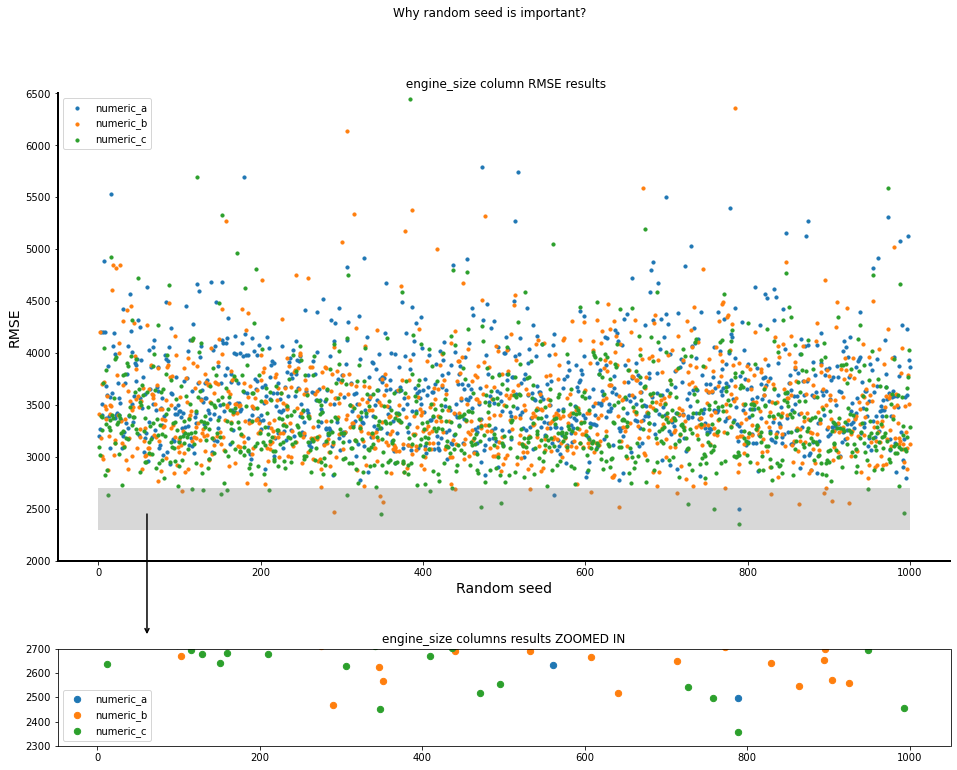

In [22]:
results = []
labels = ['numeric_a','numeric_b' ,'numeric_c']
df_seed_check(df_list,'engine_size',1000)
num_a_results = results[:1000].copy()
num_b_results = results[1000:2000].copy()
num_c_results = results[2000:].copy()

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Why random seed is important?')

grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
ax1 = plt.subplot(grid[0:6, 0])

y_list = [num_a_results, num_b_results, num_c_results]
scatter_3(list(range(1,1001)), y_list, labels, 10)

plt.legend()
plt.title(' engine_size column RMSE results')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)

ax1.add_patch(Rectangle((0, 2300), 1000, 400, alpha=0.3, facecolor = 'grey'))
plt.legend(loc=2)

plt.ylim(2000,6500)
plt.arrow(2,-3000, 10,500)

ax2 = plt.subplot(grid[6:, 0])
scatter_3(list(range(1,1001)), y_list, labels, 40)

plt.legend()
plt.title('engine_size columns results ZOOMED IN')
spines(ax1,xl='Random seed')
ax.tick_params(labelsize=12)
plt.ylim(2300,2700)
plt.legend(loc=3)


con = ConnectionPatch(
    xyA=(0.1, 0.1), coordsA=ax1.transAxes,
    xyB=(0.1, 2759.7), coordsB=ax2.get_yaxis_transform(),
    arrowstyle="->", linewidth=1.5)
ax2.add_artist(con)
plt.show()

The above scatter plot presents 1000 rmse results for each of our 3 dataframes, but only the engine size column. For each result we've changed the random seed number. This clearly shows how different the results can be if we change the order of our dataframes index and split. 

<a id='how221'></a>

# 2.2.1. Sidenote how many random seeds do we need?
[back to top](#top)

At first using various random seeds looks very attractive - we can improve our results in a very easy way. But we're only improving them in this single dataset example... and our end goal is to create a model that can be 'released into the wild' and work on various datasets isn't it? Thus we should pursue not the single best result but mean of many results. All of this comes at a price: computing models with multiple random seeds takes time and computational power. We must try to answer the question: how much is enough?

In [23]:
nums = []
x = 1
for n in list(range(1,7)):
    x *= 4
    nums.append(x)
nums

[4, 16, 64, 256, 1024, 4096]

In [24]:
mean_list = []
std_list = []
best_list = []
for n in nums:    
    results = []
    df_list = [numeric_c_n]
    x = df_seed_check(df_list,'engine_size',n)
    mean_list.append(np.std(results))
    std_list.append(np.mean(results))
    best_list.append(x)
    
seed_frame = pd.DataFrame([mean_list,std_list,best_list], index=('std','mean','best result'), columns=[str(col) for col in nums])
seed_frame = seed_frame.transpose()
seed_frame['best result'] = seed_frame['best result'].str[0].str[1]
seed_frame['mean change'] =(seed_frame['mean'] - seed_frame['mean'].shift()) / seed_frame['mean'].shift() * 100
seed_frame['best result change'] =(seed_frame['best result'] - seed_frame['best result'].shift()) / seed_frame['best result'].shift() * 100
seed_frame.index.name = 'number of seeds'
seed_frame

,std,mean,best result,mean change,best result change
number of seeds,,,,,
4,169.773707,3220.754961,3014.293169,NaN,NaN
16,531.362191,3388.531008,2636.971126,5.209215,-12.517762
64,420.287777,3438.397706,2636.971126,1.471632,0.000000
256,447.763487,3397.101321,2636.971126,-1.201036,0.000000
1024,453.550087,3385.32257,2353.206318,-0.346729,-10.761013
4096,439.748785,3372.912832,2306.099998,-0.366575,-2.001793


In [25]:
df_list = [numeric_c]
%timeit df_seed_check(df_list,'engine_size',4)

24.7 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%timeit df_seed_check(df_list,'engine_size',16)

133 ms ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit df_seed_check(df_list,'engine_size',256)

1.88 s ± 358 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit df_seed_check(df_list,'engine_size',1024)

6.96 s ± 1.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


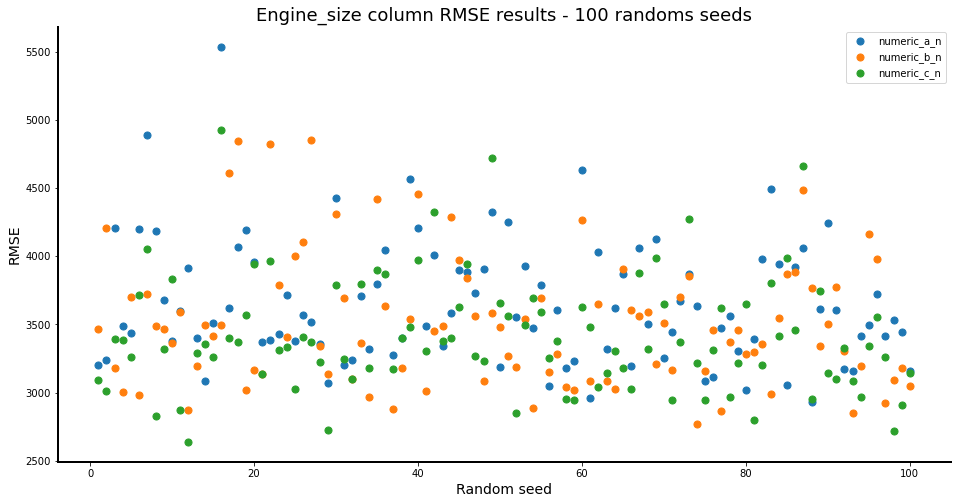

In [29]:
df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]
results = []
labels = ['numeric_a_n','numeric_b_n' ,'numeric_c_n']
df_seed_check(df_n_list,'engine_size',100)
num_a_results = results[:100].copy()
num_b_results = results[100:200].copy()
num_c_results = results[200:].copy()
fig, ax = plt.subplots(figsize=(16,8))
ax1 = plt.subplot()
y_list = [num_a_results, num_b_results, num_c_results]
scatter_3(list(range(1,101)), y_list, labels=labels, size=50)

plt.title('Engine_size column RMSE results - 100 randoms seeds',size=18)
plt.legend(loc=1)
spines(ax1,xl='Random seed')
plt.show()

# Observations:
* as we increase the number of random seeds we're testing, the best result is dropping
    * the dataset is being reshuffled in a way that's more beneficient for the rmse results
    * Theoretically if we were to constantly increase the number of random seeds, eventually we'd hit the perfect score (we're not going to check that in this notebook, I like my laptop)
* the mean of the model results doesn't change much as we increase the number of random seeds
* **standard deviation does register significant changes at first - it should be a good indicator of our smallest number of random seeds**
* 100 random seeds should be a number high enough to test the model without significant computing time (at this stage)

<a id='compare23'></a>

# 2.3. Comparing results of normalized and non normalized dataframes:
[back to top](#top)

In [30]:
# create dataframes with average results for every column:

# non normalized results: 
df_list = [numeric_a, numeric_b, numeric_c]
for col in results_frame.columns:
    results_frame[col].values[:] = 0
for n in list(range(0,100)):
    rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test,dlist=df_list ,r=n)
    results_df = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
    results_frame += results_df
results_frame_non = results_frame / len(list(range(0,100)))

# normalized results: 
for col in results_frame.columns:
    results_frame[col].values[:] = 0
for n in list(range(0,100)):
    rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test,dlist=df_n_list ,r=n)
    results_df = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
    results_frame += results_df
results_frame_norm = results_frame / len(list(range(0,100)))
results_frame_norm.columns = ['numeric_a_n','numeric_b_n','numeric_c_n']

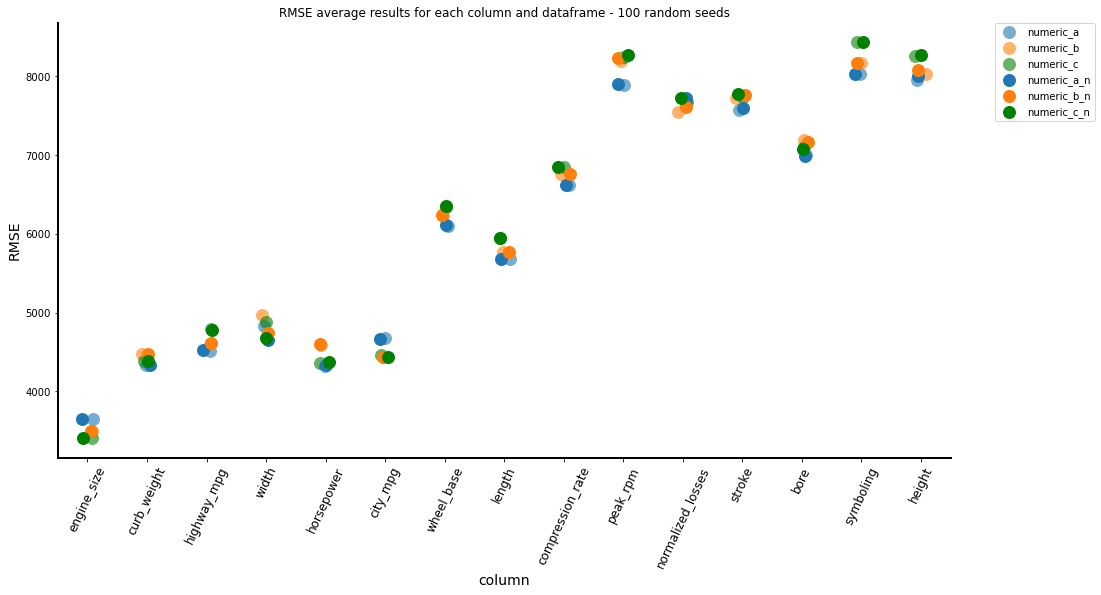

In [31]:
y_list1 = [results_frame_non['numeric_a'], results_frame_non['numeric_b'], results_frame_non['numeric_c']]
y_list2 = [results_frame_norm['numeric_a_n'], results_frame_norm['numeric_b_n'], results_frame_norm['numeric_c_n']]

fig, ax = plt.subplots(figsize=(16,8))

scatter_3v2(results_frame_non.index, y_list1, labels, 13, alpha=0.6)
scatter_3v2(results_frame_norm.index, y_list2, labels, 13)

spines(ax,xl='column')
ax.tick_params(axis = 'x',labelsize=12, rotation=65)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::15], ['numeric_a','numeric_b','numeric_c','numeric_a_n','numeric_b_n','numeric_c_n'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('RMSE average results for each column and dataframe - 100 random seeds')
plt.show()

**Observations:**
- engine_size has the best rmse average results
- very small difference between normalized and non-normalized dataframes

In [32]:
# lets check our average results BUT only for the first 6 columns (the idea is -
# we know we won't use all of the columns for multi-column models)
pd.concat([results_frame_norm[:6].mean(), results_frame_non[:6].mean()])

numeric_a_n    4358.715630
numeric_b_n    4396.028186
numeric_c_n    4344.353694
numeric_a      4390.045094
numeric_b      4429.656350
numeric_c      4383.198739
dtype: float64

# Observations:
* combination of numeric_c_n dataframe and engine_size column deliver the best results 
* worth noting that numeric_c_n is not the best dataframe for many columns 
    * this might mean that in the next steps (when we're going to try multiple column models) numeric_c_n is not going to be the best dataframe
* normalized dataframes perform slighly better - **we'll stop using non-normalized dataframes**

<a id='colsel231'></a>

# 2.4. Column selection
[back to top](#top)

Knowing that in the future we'll try to develop multiple-column models it's worth trying to guess which columns we're going to use in those models. Engine_size column is always going to be included, but what other columns are worthy of our attention?

In [33]:
results_frame_norm[:6]

,numeric_a_n,numeric_b_n,numeric_c_n
engine_size,3646.149961,3503.280847,3411.582309
curb_weight,4333.835797,4479.708402,4381.759039
highway_mpg,4521.929554,4609.537973,4783.851207
width,4647.999496,4747.806227,4679.850873
horsepower,4334.431229,4596.600987,4367.352011
city_mpg,4667.947744,4439.234678,4441.726729


**we'll use the index of the above dataframe for column selection:**

Lets check average rmse results for every dataframe for 2 single columns:

In [34]:
results_frame_norm[:6][:2].mean()

numeric_a_n    3989.992879
numeric_b_n    3991.494625
numeric_c_n    3896.670674
dtype: float64

Lets check average rmse results for every dataframe for 4 columns:

In [35]:
results_frame_norm[:6][:4].mean()

numeric_a_n    4287.478702
numeric_b_n    4335.083362
numeric_c_n    4314.260857
dtype: float64

Lets check average rmse results for every dataframe for 6 columns:

In [36]:
results_frame_norm[:6][:6].mean()

numeric_a_n    4358.715630
numeric_b_n    4396.028186
numeric_c_n    4344.353694
dtype: float64

# Observations:
* There is no single best combination
    * different columns perform differently in different dataframes
    * the only certain value is the engine_size column - we can clearly see we'll always want to include that column in our models, unfortunatelly at this stage it's not practical to answer what other columns, how many, which dataframe we'll want to use in the future models



<a id='multi3'></a>

# 3. Multivariate Model
[back to top](#top)

Lets include multiple columns in our model, we'll use the index of the dataframe with best columns(step 2.4.) as an indicator of which columns should we use. 

<a id='prep31'></a>

# 3.1. Preparation and test  

In [37]:
# lets change our previous train/ test function so that it includes multiple columns:
def knn_train_test_v3(df, train_cols, target_col, seed, k=5):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    rmse_dict = {} 
    
    # futureproof: we're not going to use multiple k values yet, but we will in the future
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #model:
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    
    return rmse

In [38]:
def fill_dict_v2(model,col_list, dlist=df_n_list, r=1, k=5, ):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    rmse_dict_a[str(col_list)] = model(dlist[0], col_list, 'price', r, k)
    rmse_dict_b[str(col_list)] = model(dlist[1], col_list, 'price', r, k)
    rmse_dict_c[str(col_list)] = model(dlist[2], col_list, 'price', r, k)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c

# loop of columns:
df_results_list = []
for n in list(range(2,8)):
    col_list = results_frame_norm.index[:n].tolist()
    dict_a, dict_b, dict_c = fill_dict_v2(knn_train_test_v3, col_list)
    results_frame = give_results_df(dict_a, dict_b, dict_c)
    df_results_list.append(results_frame)
mutli_cols_df = pd.concat(df_results_list) 
mutli_cols_df.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
mutli_cols_df.sort_values('numeric_c_n')

,numeric_a_n,numeric_b_n,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",3596.417368,3655.264952,2532.332056
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",3416.042892,3628.898274,2644.465049
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",3410.217013,3789.590624,2725.092022
"['engine_size', 'curb_weight']",3330.869800,3657.896664,2791.664988
"['engine_size', 'curb_weight', 'highway_mpg']",3413.544315,3848.872270,2964.095155
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base']",3659.516895,3999.202836,3119.720636


That's a significant improvement, lets not forget though: it's a single test on 1 random seed.

<a id='test32'></a>

# 3.2. Test on 100 random seeds
[back to top](#top)

In [39]:
for col in mutli_cols_df.columns:
    mutli_cols_df[col].values[:] = 0
cols_frame = mutli_cols_df[:0].copy()

# loop of random seeds:
for i in list(range(0,100)):
    # loop of columns:
    df_results_list = []
    for n in list(range(2,8)):
        col_list = results_frame_norm.index[:n].tolist()
        dict_a, dict_b, dict_c = fill_dict_v2(knn_train_test_v3, col_list, r=i)
        results_frame = give_results_df(dict_a, dict_b, dict_c)
        df_results_list.append(results_frame)
    to_add = pd.concat(df_results_list) 
    to_add.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
    cols_frame = cols_frame.append(to_add)
cols_frame[:5]

,numeric_a_n,numeric_b_n,numeric_c_n
"['engine_size', 'curb_weight']",3228.359525,4256.826853,3477.979752
"['engine_size', 'curb_weight', 'highway_mpg']",3125.160344,4255.565360,3621.460394
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",3273.331358,4694.873426,3388.959768
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",3112.224563,4329.296422,3637.414232
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",3241.827913,4052.052106,3645.852617


Lets group the results by their input columns and display the mean value for every column combination:

In [40]:
mean_frame = cols_frame.groupby(level=0).mean()
mean_frame['min value'] = mean_frame.min(axis=1)
mean_frame['best df'] = mean_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
mean_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['engine_size', 'curb_weight']",3682.784458,3753.830141,3595.801513,3595.801513,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",3629.039749,3733.883104,3676.055245,3629.039749,numeric_a_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",3661.143393,3762.183618,3713.839165,3661.143393,numeric_a_n
"['engine_size', 'curb_weight', 'highway_mpg']",3744.533452,3836.744851,3722.420131,3722.420131,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",3762.442996,3843.108108,3792.881284,3762.442996,numeric_a_n


**Mean observations:**
* 2 column model delivers the lowest(best) results on average 
    * numeric_c_n is the winner for 2 column model
* 6 column model take the second place, 5 column model takes third
    * in both of these models dataframe numeric_a_n delivers the best results

Lets group the results by their input columns and display the minimum value for every column combination:

In [41]:
min_frame = cols_frame.groupby(level=0).min()
min_frame['min value'] = min_frame.min(axis=1)
min_frame['best df'] = min_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
min_frame.sort_values('min value')

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",2318.076629,2324.881102,2249.517922,2249.517922,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",2276.782559,2387.439304,2383.434823,2276.782559,numeric_a_n
"['engine_size', 'curb_weight', 'highway_mpg']",2510.426401,2423.967138,2333.405493,2333.405493,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",2574.248405,2513.923029,2396.464561,2396.464561,numeric_c_n
"['engine_size', 'curb_weight']",2513.273993,2469.453935,2568.686643,2469.453935,numeric_b_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base']",2494.004238,2506.046462,2504.532566,2494.004238,numeric_a_n


In [42]:
cols_frame.groupby(level=0).min().min()

numeric_a_n    2276.782559
numeric_b_n    2324.881102
numeric_c_n    2249.517922
dtype: float64

**Min value observations:**
* 6 column model delivers the lowest(best) single result 
    * numeric_c_n delivers the best result
* 5 column model take the second place, 3 column model takes third
    * numeric_a_n performs best in 5 column model
    * numeric_c_n performs best in 3 column model

In [43]:
std_frame = cols_frame.groupby(level=0).std()
std_frame['min value'] = std_frame.min(axis=1)
std_frame['best df'] = std_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
std_frame.sort_values('min value')

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['engine_size', 'curb_weight', 'highway_mpg']",654.838537,738.078229,563.156199,563.156199,numeric_c_n
"['engine_size', 'curb_weight']",647.510903,730.505719,573.764612,573.764612,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",693.940031,778.047962,638.636391,638.636391,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base']",731.347721,794.591040,685.112527,685.112527,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",715.482269,773.335242,685.414110,685.414110,numeric_c_n
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",713.580811,776.581351,689.375058,689.375058,numeric_c_n


In [44]:
cols_frame.groupby(level=0).std().min()

numeric_a_n    647.510903
numeric_b_n    730.505719
numeric_c_n    563.156199
dtype: float64

**Std value observations:**
* 3 column model delivers the lowest std 
    * numeric_c_n delivers the best result
* 2 column model take the second place, 4 column model takes third
    * numeric_c_n performs best in every column model

<a id='testm33'></a>

# 3.3. Testing  multiple column combinations 
[back to top](#top)

Having tested multivariate model, we've improved our results. But lets not forget how we choose the columns for that model:
* we picked them out of the single column results table
That is probably not the best way of selecting columns for multivariate model. After all the univariate model results are based on single column results, we shouldn't treat that as a certain indicator of those columns multivariate performance. Instead: **lets try more column combinations**
* we'll always include engine_size column
* we'll limit the number of columns to 7 total
* we'll check all possible combinations of engine_size and at least 1 more column but no more than 6 more

# 3.3.1. Generating results 

In [45]:
best_cols_list = results_frame_norm.index[:7].tolist()
top6cols = best_cols_list[1:7]
best_cols_list
for col in mutli_cols_df.columns:
    mutli_cols_df[col].values[:] = 0
cols_frame = mutli_cols_df[:0].copy()
# random seed loop:
for i in list(range(0,100)):
    # column combinations loop:
    for n in list(range(1,7)): 
        cc = list(combinations(top6cols,n))
        cols_list = []
        for el in cc:
            cols_list.append(list(el))
        for el in cols_list:
            el.append(best_cols_list[0])
        # cols list ready now
        df_results_list = []
        for el in cols_list:
            dict_a, dict_b, dict_c = fill_dict_v2(knn_train_test_v3, el, r=i)
            results_frame = give_results_df(dict_a, dict_b, dict_c)
            df_results_list.append(results_frame)
        to_add = pd.concat(df_results_list)
        to_add.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
        cols_frame = cols_frame.append(to_add)
cols_frame[:10] 

,numeric_a_n,numeric_b_n,numeric_c_n
"['curb_weight', 'engine_size']",3228.359525,4256.826853,3477.979752
"['highway_mpg', 'engine_size']",3062.032054,3396.052505,3950.420641
"['width', 'engine_size']",3532.581550,4505.704490,3662.583547
"['horsepower', 'engine_size']",3544.814633,3804.656531,3061.882330
"['city_mpg', 'engine_size']",3435.218515,3756.841251,2770.972665
...,...,...,...
"['curb_weight', 'highway_mpg', 'width', 'city_mpg', 'wheel_base', 'engine_size']",3505.913738,3251.852300,4346.353123
"['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size']",3406.833316,2951.899134,4158.433308
"['curb_weight', 'width', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size']",3314.754292,3130.562263,4184.379340
"['highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size']",3338.851297,2919.016735,4425.276523


**That's a few rows to process and analyse, we'll start with a simple visualization, to help us understand the next steps.**

<a id='viz332'></a>

# 3.3.2. Visualization of results
[back to top](#top)

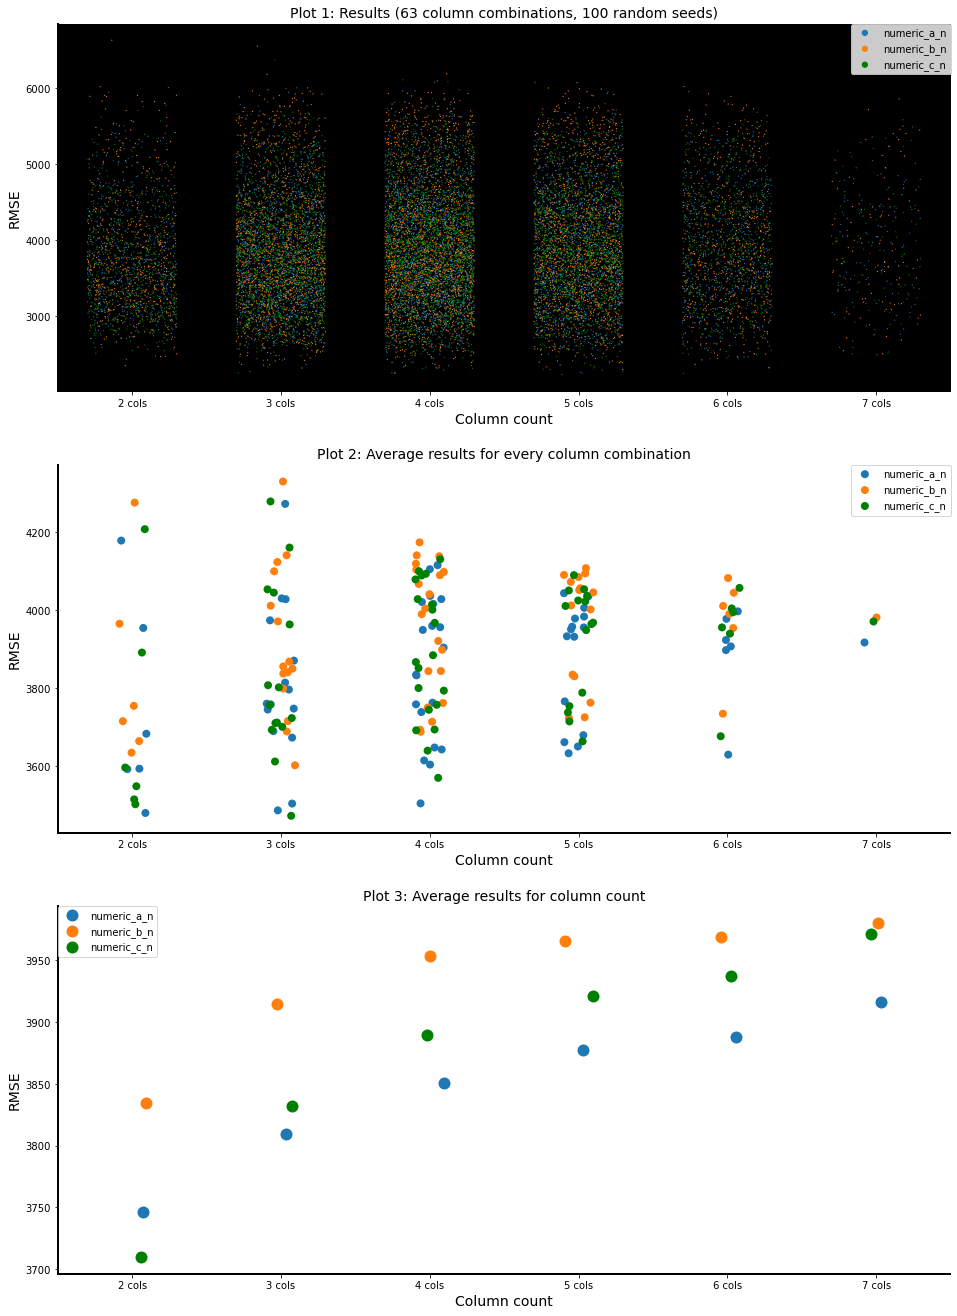

In [46]:
cols_frame_plot = cols_frame.copy()
index_list = []
for el in cols_frame_plot.index:
    index_list.append((str(el.count(',')+1)+' cols'))
cols_frame_plot.index = index_list
cols_frame_plot = cols_frame_plot.sort_index()

mean_frame = cols_frame.groupby(level=0).mean()
index_list = []
for el in mean_frame.index:
    index_list.append((str(el.count(',')+1)+' cols'))
mean_frame_plot = mean_frame.copy()
mean_frame_plot.index = index_list
mean_frame_plot = mean_frame_plot.sort_index()
mean_frame_plot2 = mean_frame_plot.groupby(level=0).mean()

fig, ax = plt.subplots(figsize=(16,23))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax0=plt.subplot(311)
y_list = [cols_frame_plot['numeric_a_n'], cols_frame_plot['numeric_b_n'], cols_frame_plot['numeric_c_n']]
scatter_3v2(cols_frame_plot.index,y_list,labels, size=1.2, alpha = 1, z=0.3)
plt.title('Plot 1: Results (63 column combinations, 100 random seeds)',size=14)
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6], ['numeric_a_n','numeric_b_n','numeric_c_n'],  loc=1, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]
ax0.set_facecolor('black')

ax1=plt.subplot(312)
y_list = [mean_frame_plot['numeric_a_n'], mean_frame_plot['numeric_b_n'], mean_frame_plot['numeric_c_n']]
scatter_3v2(mean_frame_plot.index,y_list,labels, size=8, alpha = 1)
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[::6], ['numeric_a_n','numeric_b_n','numeric_c_n'],  loc=1, borderaxespad=0.)

plt.title('Plot 2: Average results for every column combination',size=14)

ax2=plt.subplot(313)
y_list = [mean_frame_plot2['numeric_a_n'], mean_frame_plot2['numeric_b_n'], mean_frame_plot2['numeric_c_n']]
scatter_3v2(mean_frame_plot2.index, y_list, labels, size=12, alpha = 1)
handles, labels = ax2.get_legend_handles_labels()
l = plt.legend(handles[::6], ['numeric_a_n','numeric_b_n','numeric_c_n'],  loc=2, borderaxespad=0.)

plt.title('Plot 3: Average results for column count',size=14)
axes = [ax0, ax1, ax2]
for ax in axes:
    spines(ax, xl='Column count')
#     ax.set_ylabel('Rmse')
#     ax.set_xlabel('Column count')
plt.show()

# Observations:
The three plots may look a bit overwhelming at first but it's shouldn't be hard to understand:
1. First plot is a visualization of all the results.
   * we have 63 column combinations (it's always engine size and minimum 1 more column)
   * 100 random seeds for every column combination
   * to create a bit of order when plotting the results, we've grouped the results on x-axis by column count
2. In second plot we've already grouped all the results by their column combination and the each represents the average result for 100 random seeds for each column combination.
    * eg. combination of 'highway_mpg' and 'engine_size' had 100 random seed results and we've plotted the mean of those 100 results with 1 dot
    * this is probably the most important plot, it's a middle ground between the simplicity and  lack of depth of the last plot and the abundance of data of the first plot
3. In the last plot we've measerued the mean of all the combinations for each column count and plotted it again grouped by column count.
    * we can see that if we were to oversimplify the results the 2 column model on average delivers the best results (combined with numeric_a_n or numeric_c_n dataframes)
    * dataframe numeric_b_n always delivers the worst (highest rmse) results 
4. Lets quickly get back to plot 2 and notice the important fact:
    * looking for the lowest achieved results we can find them at the 2 column and 3 column marks (there's also a single 4 column result that will be somewhere very close to best result), always numeric_a_n and numeric_c_n

Now instead of trying to guess which dot is lower, lets look at the numbers:


<a id='res333'></a>

# 3.3.3. Results analysis
[back to top](#top)

In [47]:
# lets group all the '100 random seed runs' into 1 row:
mean_frame = cols_frame.groupby(level=0).mean()
# analyze results:
mean_frame['min value'] = mean_frame.min(axis=1)
mean_frame['best df'] = mean_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
mean_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['horsepower', 'city_mpg', 'engine_size']",3486.106650,3601.674566,3472.221711,3472.221711,numeric_c_n
"['highway_mpg', 'engine_size']",3479.492569,3663.626929,3548.028924,3479.492569,numeric_a_n
"['horsepower', 'engine_size']",3592.997303,3634.020534,3501.877159,3501.877159,numeric_c_n
"['highway_mpg', 'horsepower', 'engine_size']",3503.590497,3688.249982,3611.423671,3503.590497,numeric_a_n
"['highway_mpg', 'horsepower', 'city_mpg', 'engine_size']",3504.043639,3692.797647,3569.490424,3504.043639,numeric_a_n


(sidenote: remember which columns and dataframe were considered the best in step 2.4? are they different to the columns in the above table?)

Quick reminder: every row is an individual column combination that had gone trough our model 100 times with a different random seed each time. Then we've calculated the mean of those 100 results for every combination and now we can see the best (lowest) 5 results above.

**Observations:**
* surprisingly a 3 column model('horsepower', 'city_mpg', 'engine_size') delivers the lower average result for its 100 runs on different random seeds, dataframe : numeric_c_n
* it's closely followed by a 2 column ('highway_mpg', 'engine_size') model, dataframe : numeric_a_n


In [48]:
# lets group all the '100 random seed runs' into 1 row:
std_frame = cols_frame.groupby(level=0).std()
# analyze results:
std_frame['min value'] = std_frame.min(axis=1)
std_frame['best df'] = std_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
std_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['highway_mpg', 'city_mpg', 'engine_size']",510.436332,651.061747,530.402643,510.436332,numeric_a_n
"['highway_mpg', 'engine_size']",585.324504,596.409823,511.322197,511.322197,numeric_c_n
"['curb_weight', 'highway_mpg', 'engine_size']",654.924366,738.105358,563.106099,563.106099,numeric_c_n
"['curb_weight', 'engine_size']",647.274010,730.527653,573.741237,573.741237,numeric_c_n
"['city_mpg', 'engine_size']",577.116755,717.079346,575.689823,575.689823,numeric_c_n


**Observations:**
* luckly our best model from previous table (by mean of 100 results) also has a low standard deviation result 
* the first two combination are the same in std and mean table, unfortunately different dataframes deliver best results in both cases, but having that knowledge we can make a choice
    * should we prioritize std or mean, we know which columns / dataframes to use


In [49]:
# lets group all the '100 random seed runs' into 1 row:
min_frame = cols_frame.groupby(level=0).min()
# analyze results:
min_frame['min value'] = min_frame.min(axis=1)
min_frame['best df'] = min_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
min_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size']",2232.838670,2586.170058,2556.594386,2232.838670,numeric_a_n
"['curb_weight', 'horsepower', 'city_mpg', 'engine_size']",2247.562752,2449.312953,2661.953333,2247.562752,numeric_a_n
"['curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'engine_size']",2318.076629,2324.881102,2249.083822,2249.083822,numeric_c_n
"['curb_weight', 'width', 'horsepower', 'engine_size']",2292.644801,2253.987320,2452.391139,2253.987320,numeric_b_n
"['curb_weight', 'highway_mpg', 'horsepower', 'engine_size']",2256.006738,2540.914745,2625.906921,2256.006738,numeric_a_n


Having looked at the mean of the results and their std, it's worth taking a peak at what is the single best result and what combination achieved it ('curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size' columns on a numeric_a_n dataframe)

In [50]:
std_frame.loc["['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size']"]

numeric_a_n     679.981298
numeric_b_n     782.460179
numeric_c_n      647.11019
min value        647.11019
best df        numeric_c_n
Name: ['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size'], dtype: object

In [51]:
mean_frame.loc["['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size']"]

numeric_a_n    3678.997546
numeric_b_n    3829.775032
numeric_c_n    3787.792919
min value      3678.997546
best df        numeric_a_n
Name: ['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'engine_size'], dtype: object

<a id='hyper34'></a>

# 3.4. Hyperparameter Tuning
[back to top](#top)

Now lets recreate all the steps from previous chapter and multiply them by 25 'k' values... Woah that's like 3 dataframes, 63 column combinations, 100 random seeds and now 25 different k values? Remember we used to test more than 1000 random seeds?

In [52]:
best_cols_list = results_frame_norm.index[:7].tolist()
top6cols = best_cols_list[1:7]
best_cols_list
for col in mutli_cols_df.columns:
    mutli_cols_df[col].values[:] = 0
cols_framek = mutli_cols_df[:0].copy()
# k value loop (26)
for z in list(range(1,26)):
    # random seed loop - 100:
    for i in list(range(0,100)):
        # column combinations loop(7):
        for n in list(range(1,7)): 
            cc = list(combinations(top6cols,n))
            cols_list = []
            for el in cc:
                cols_list.append(list(el))
            for el in cols_list:
                el.append(best_cols_list[0])
            # cols list ready now
            df_results_list = []
            for el in cols_list:
                dict_a, dict_b, dict_c = fill_dict_v2(knn_train_test_v3, el, r=i, k=z)
                results_frame = give_results_df(dict_a, dict_b, dict_c)
                results_frame = results_frame.rename(index={results_frame.index[-1]: results_frame.index[-1]+' k: '+str(z) })
                df_results_list.append(results_frame)
            to_add = pd.concat(df_results_list)
            to_add.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
            cols_framek = cols_framek.append(to_add)       
cols_framek[:10]

,numeric_a_n,numeric_b_n,numeric_c_n
"['curb_weight', 'engine_size'] k: 1",3572.476984,3928.853331,2911.558220
"['highway_mpg', 'engine_size'] k: 1",2888.327174,3151.107410,3940.517316
"['width', 'engine_size'] k: 1",2658.439165,3607.760014,3425.534883
"['horsepower', 'engine_size'] k: 1",2728.447665,3882.533376,3168.868620
"['city_mpg', 'engine_size'] k: 1",2749.070667,3877.164534,3298.299729
...,...,...,...
"['curb_weight', 'highway_mpg', 'width', 'city_mpg', 'wheel_base', 'engine_size'] k: 25",4155.780741,3710.439720,5451.948552
"['curb_weight', 'highway_mpg', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size'] k: 25",3824.806711,3384.392847,4936.625388
"['curb_weight', 'width', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size'] k: 25",3882.762810,3311.054466,4988.003369
"['highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base', 'engine_size'] k: 25",3890.665778,3398.175901,5006.909143


In [53]:
# lets group all the '100 random seed runs' into 1 row:
mean_frame = cols_framek.groupby(level=0).mean()
# analyze results:
mean_frame['min value'] = mean_frame.min(axis=1)
mean_frame['best df'] = mean_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
mean_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['horsepower', 'city_mpg', 'engine_size'] k: 2",3111.109682,3221.824832,3086.584667,3086.584667,numeric_c_n
"['horsepower', 'engine_size'] k: 2",3209.018693,3246.876181,3107.182528,3107.182528,numeric_c_n
"['highway_mpg', 'engine_size'] k: 2",3163.525840,3337.194600,3155.707789,3155.707789,numeric_c_n
"['horsepower', 'city_mpg', 'engine_size'] k: 3",3174.210462,3296.011471,3156.049960,3156.049960,numeric_c_n
"['curb_weight', 'horsepower', 'city_mpg', 'engine_size'] k: 1",3170.428320,3252.506225,3276.417479,3170.428320,numeric_a_n


In [54]:
min_frame = cols_framek.groupby(level=0).min()
# analyze results:
min_frame['min value'] = min_frame.min(axis=1)
min_frame['best df'] = min_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
min_frame.sort_values('min value')[:5]

,numeric_a_n,numeric_b_n,numeric_c_n,min value,best df
"['curb_weight', 'width', 'horsepower', 'city_mpg', 'engine_size'] k: 1",2202.498604,1875.722236,2251.406929,1875.722236,numeric_b_n
"['curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'engine_size'] k: 1",2029.547118,1929.328304,2221.236631,1929.328304,numeric_b_n
"['curb_weight', 'highway_mpg', 'width', 'horsepower', 'engine_size'] k: 2",1948.147033,2163.093561,2027.308791,1948.147033,numeric_a_n
"['curb_weight', 'highway_mpg', 'width', 'engine_size'] k: 1",2119.891409,1957.382290,2120.227003,1957.382290,numeric_b_n
"['highway_mpg', 'width', 'city_mpg', 'engine_size'] k: 1",1972.105775,2337.443067,2066.061022,1972.105775,numeric_a_n


In [55]:
# lets group the dataframe rows by number of columns and k value:
cols_framek_plot = cols_framek.groupby(level=0).mean()
index_list = []
for el in cols_framek_plot.index:
    index_list.append((str(el.count(',')+1)+' cols' + el[el.find(' k:'):]))

cols_framek_plot.index = index_list

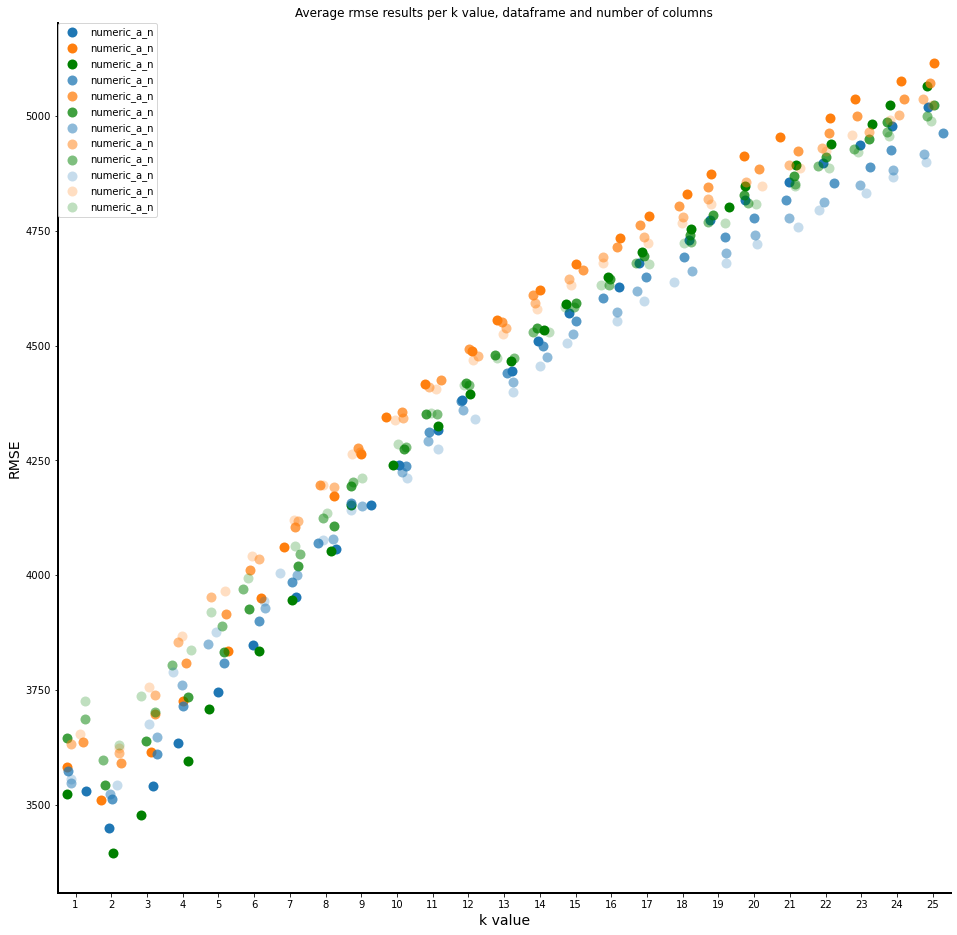

In [56]:
cols_ks_frame = cols_framek_plot.groupby(level=0).mean()
cols_ks_frame['cols'] = cols_ks_frame.index.str[:6]
index_list = []
for el in cols_ks_frame.index:
    index_list.append(int(el[el.find('k:')+2:]))
cols_ks_frame.index = index_list
cols_ks_frame.sort_index
n = 0
fig, ax = plt.subplots(figsize=(16,16))
for el in cols_ks_frame['cols'].value_counts().index.tolist()[:-2]:
    n += 0.25
    frame1 = cols_ks_frame[cols_ks_frame['cols']==el].sort_index()
    y_list = [frame1['numeric_a_n'], frame1['numeric_b_n'], frame1['numeric_c_n']]
    scatter_3v2(frame1.index,y_list,labels, size=10, alpha = 1.25-n, z=0.3)
spines(ax,xl='k value')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::25],labels,  loc=2, borderaxespad=0.)
plt.title('Average rmse results per k value, dataframe and number of columns')
plt.show()

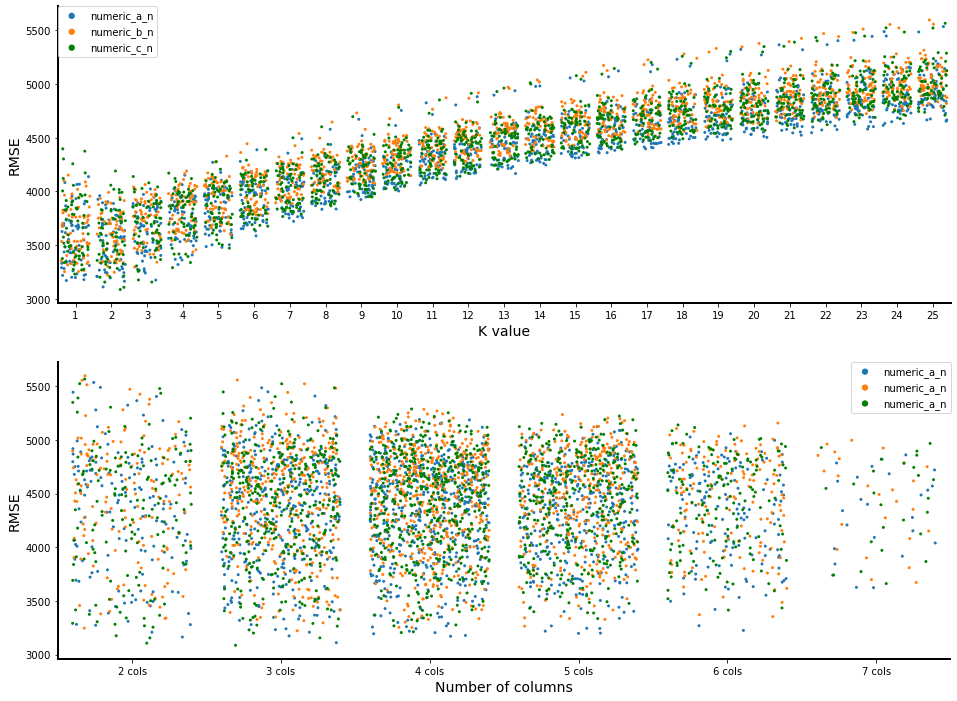

In [57]:
mean_frame_plot0 = cols_framek.groupby(level=0).mean().copy()
k_index = []
for el in mean_frame_plot0.index:
    k_index.append(int(el[el.find('k:')+2:]))
mean_frame_plot0.index = k_index

index_list = []
mean_frame_plot = cols_framek.groupby(level=0).mean()
for el in mean_frame_plot.index:
    index_list.append((str(el.count(',')+1)+' cols'))
mean_frame_plot.index = index_list

fig, ax = plt.subplots(figsize=(16,12))
ax1 = plt.subplot(211)
y_list = [mean_frame_plot0['numeric_a_n'], mean_frame_plot0['numeric_b_n'], mean_frame_plot0['numeric_c_n']]
scatter_3v2(mean_frame_plot0.index,y_list,labels, size=3, alpha = 1, z=0.4)
spines(ax1, xl='K value')
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6], ['numeric_a_n','numeric_b_n','numeric_c_n'],  loc=2, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]

ax2 = plt.subplot(212)
y_list = [mean_frame_plot['numeric_a_n'], mean_frame_plot['numeric_b_n'], mean_frame_plot['numeric_c_n']]
scatter_3v2(mean_frame_plot.index,y_list,labels, size=3, alpha = 1,z=0.4)
spines(ax2, xl='Number of columns')
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6], labels,  loc=1, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]
plt.show()

**Observations:**
* positive correlation between number of columns and rmse results has been depreciated by introduction of k values into our model
* strong positive correlation between rmse results and k value number (with the exception of the first 2 numbers)
* k value of 2 delivers the best results

<a id='cross35'></a>

# 3.5. Cross validation
[back to top](#top)

In our last step we've generated a dataframe consisting of 157500 rows, now we want to include cross validation in our model which in turn will again drastically increase the amount of generated data. We'll try to limit our processing time:
* we'll limit the possible k-value numbers to 1,2 and 3
* we'll cut down on column numbers - we'll remove the 7 column option

In [58]:
# update the training model:
def knn_train_test_v4(df, train_cols, target_col, r, k, fold):
    rmse_dict = {} 
    # train and test 
    kf = KFold(fold, shuffle=True, random_state=r)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    return avg_rmse

# update the function that fills the dictionaries:
def fill_dict_3(model,col_list, dlist=df_n_list, r=1, k=5, fold=5):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    rmse_dict_a[str(col_list)] = model(dlist[0], col_list, 'price', r, k, fold)
    rmse_dict_b[str(col_list)] = model(dlist[1], col_list, 'price', r, k, fold)
    rmse_dict_c[str(col_list)] = model(dlist[2], col_list, 'price', r, k, fold)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c

In [ ]:
best_cols_list = results_frame_norm.index[:6].tolist()
top6cols = best_cols_list[1:6]
best_cols_list
for col in mutli_cols_df.columns:
    mutli_cols_df[col].values[:] = 0
cols_framef = mutli_cols_df[:0].copy()
for fold in list(range(2,11)):
    # k value loop (4)
    for z in list(range(1,4)):
        # random seed loop - 100:
        for i in list(range(0,100)):
            # column combinations loop(6):
            for n in list(range(1,6)): 
                cc = list(combinations(top6cols,n))
                cols_list = []
                for el in cc:
                    cols_list.append(list(el))
                for el in cols_list:
                    el.append(best_cols_list[0])
                # cols list ready now
                df_results_list = []
                for el in cols_list:
                    dict_a, dict_b, dict_c = fill_dict_3(knn_train_test_v4, el, r=i, k=z, fold=fold)
                    results_frame = give_results_df(dict_a, dict_b, dict_c)
                    results_frame = results_frame.rename(index={results_frame.index[-1]: results_frame.index[-1]+' k: '+str(z) +' fold: '+str(fold) })
                    df_results_list.append(results_frame)
                to_add = pd.concat(df_results_list)
                to_add.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
                cols_framef = cols_framef.append(to_add)           
cols_framef[:10]

In [ ]:
# lets group all the '100 random seed runs' into 1 row:
mean_frame = cols_framef.groupby(level=0).mean()
# analyze results:
mean_frame['min avg value'] = mean_frame.min(axis=1)
mean_frame['best df'] = mean_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
mean_frame.sort_values('min avg value')[:5]

**An rmse average of 100 random seeds dipping below 2400 is a significant improvement**

In [ ]:
mean_frame = cols_framef.groupby(level=0).mean()
k_index = []
for el in mean_frame.index:
    k_index.append(int(el[el.find('fold:')+5:]))
mean_frame_plot0 = mean_frame.copy()
mean_frame_plot0.index = k_index
mean_frame_plot0 = mean_frame_plot0.sort_index()
fig, ax = plt.subplots(figsize=(16,8))
y_list = [mean_frame_plot0['numeric_a_n'], mean_frame_plot0['numeric_b_n'], mean_frame_plot0['numeric_c_n']]
scatter_3v2(mean_frame_plot0.index,y_list,labels, size=3, alpha = 1, z=0.2)
spines(ax, xl='Number of folds')
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6], labels,  loc=1, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]
plt.show()

(remember that k value of 2 always delivered best results? also 2 or 3 column models were the best in the previous step?)

**Observations:**
* introduction of cross validation has drastically improved our results - with rmse averages of 100 random seeds around 2400, sometimes below that
* all the best results have a k value of 1 and four columns (4th best result has 5 columns though)
    * k value of 2 is not present in the best results anymore, neither are 2 or 3 column models - cross validation changed a lot!
* 10 folds is dominating the top results table
* we can observe a negative correlation between number of folds and rmse results, though the decrease in rmse is only strong for the first few folds 
* dataframe 'a' dominates the best results

In [ ]:
index_list = []
mean_frame = cols_framef.groupby(level=0).mean()
mean_frame_plot_k = mean_frame
for el in mean_frame_plot_k.index:
    index_list.append((int(el[el.find('k:')+3:el.find('fold:')-1])))
mean_frame_plot_k.index = index_list
mean_frame_plot_k
fig, ax = plt.subplots(figsize=(16,8))
y_list = [mean_frame_plot_k['numeric_a_n'], mean_frame_plot_k['numeric_b_n'], mean_frame_plot_k['numeric_c_n']]
scatter_3v2(mean_frame_plot_k.index,y_list,labels, size=5, alpha = 1,z=0.4)
spines(ax,xl='K value')
plt.title('RMSE results per k value')
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6],labels,  loc=1, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]
plt.show()

In [ ]:
index_list = []
mean_frame = cols_framef.groupby(level=0).mean()
mean_frame_plotf = mean_frame
for el in mean_frame_plotf.index:
    index_list.append((str(el.count(',')+1)+' cols'))
mean_frame_plotf.index = index_list
# mean_frame_plotf = mean_frame_plotf.groupby(level=0).mean()
fig, ax = plt.subplots(figsize=(16,8))
y_list = [mean_frame_plotf['numeric_a_n'], mean_frame_plotf['numeric_b_n'], mean_frame_plotf['numeric_c_n']]
scatter_3v2(mean_frame_plotf.index,y_list,labels, size=5, alpha = 1,z=0.4)
spines(ax, xl='Number of columns')
handles, labels = ax0.get_legend_handles_labels()
l = plt.legend(handles[::6], labels,  loc=1, borderaxespad=0.)
# legend points to small? solution:
for el in l.legendHandles:
    el._sizes = [40]
plt.show()

In [ ]:
# lets group all the '100 random seed runs' into 1 row:
min_frame = cols_framef.groupby(level=0).min()
# analyze results:
min_frame['min value'] = min_frame.min(axis=1)
min_frame['best df'] = min_frame.loc[:,:'numeric_c_n'].idxmin(axis=1)
min_frame.sort_values('min value')[:5]

Looking at the table of single best result numbers we can notice that those numbers are not as good as before - another reason to use cross validation. It's harder to achieve a single best result, which in theory is closer to real world aplications. 

# What if we missed some results in the other k values?

Removing majority of k-values and 7 column combinations was risky, we know that every change introduced to the model can pottentialy make previous observations obsolete. Having that knowledge I did run the cross validation loop on all 25 k values in a different notebook. Just to be sure that we're not missing any good results: 

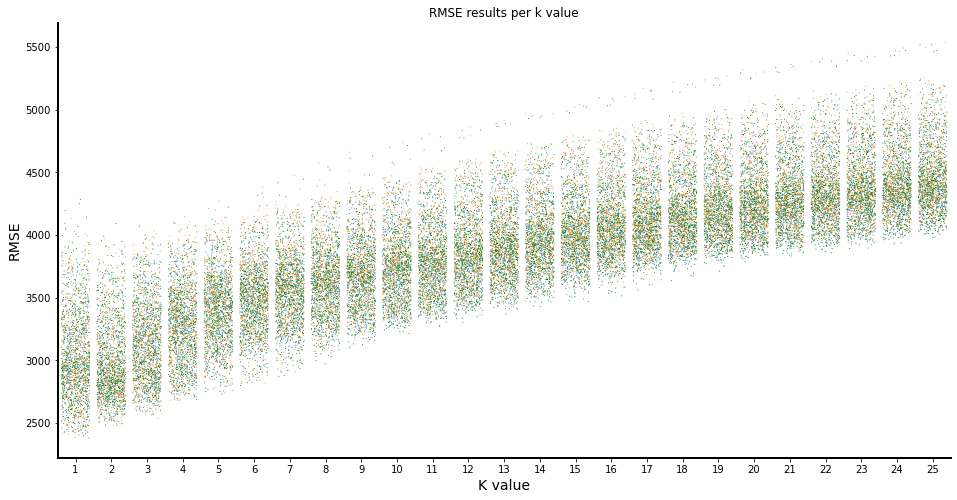

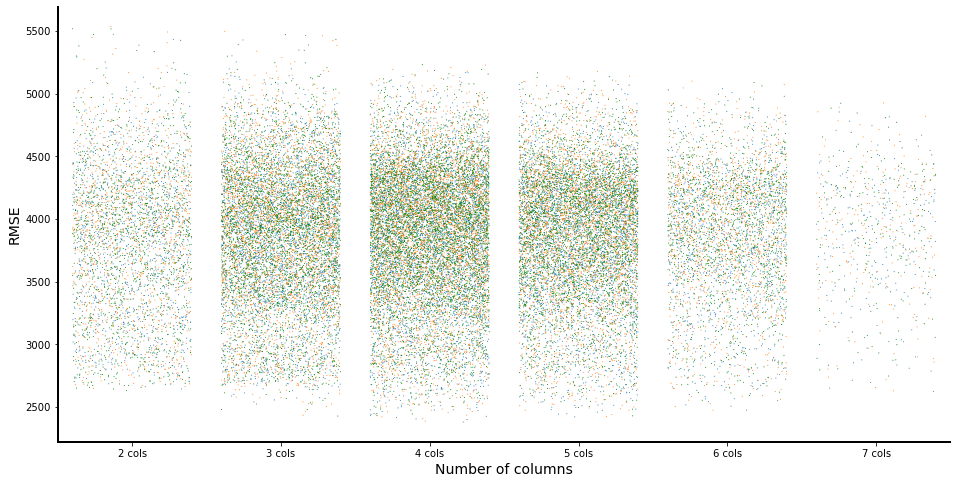

The rmse results are increasing together with k value, on top of that the 7 column combinations don't deliver any lower results than combinations with a lower number of columns. 
Intuition paid of, the results are what we expected them to be and we saved some computing in the current notebook.

# Conclusions:
Having tested multiple univariate and multivariate models we can draw a few simple conlusions for our future projects:
* there's no single best version of the dataset - different data cleaning and filling techniques create different datasets, which in turn perform differently on different models - it's worth testing out a few approaches if we have enough time and processing power
* aplying different random seeds can have a huge impact on our results - we should test our models on multiple random seeds to check models performance against datasets shuffled in different ways
* applying different techniques on an existing model may affect the previous conclusions: features and parameters that were considered the best may not be the best selection anymore after introducing additional changes
    * eg. just because 2 columns were the best amount of columns, when we were testing the column numbers doesn't mean introducing various k- values or cross valdiation won't change that - **it actually did change that**